# Hongfan Lu - Feb 26th - EDA (Video Transcripts vs Comments)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/yt-cleaned.csv')
df.shape

(128461, 440)

In [3]:
# Subdividing columns into different dataframe
a = list(df.columns)
channel_video_info = a[:8] + ['video_id','video_genre'] # channel info

video_info_vader_txtblb = ['channel_name', 'video_genre'] + a[8:30] # video info, vader and textblob scores
video_empath = ['channel_name', 'video_genre', 'video_id', 'video_title'] + a[30:224] # video transcript's empath keywords
video_perspective = ['channel_name', 'video_genre', 'video_id', 'video_title'] + ['video_toxicity', 'video_severe_toxicity', 'video_identity_attack', 'video_insult', 'video_profanity', 'video_threat'] # video transcript toxicity labelling

comment_info_vader_txtblb = ['channel_name', 'video_genre', 'video_id', 'video_title'] + a[225:243] # comment info, comment vader and textblob scores
comment_empath = ['channel_name', 'video_genre', 'video_id', 'video_title', 'comment_cleaned','comment_tokenized'] + a[243:-3] # comment transcript's empath keywords
comment_perspective = ['channel_name', 'video_genre', 'video_id', 'video_title','comment_author_id', 'comment_cleaned','comment_tokenized'] + ['comment_toxicity','comment_severe_toxicity', 'comment_identity_attack', 'comment_insult','comment_profanity', 'comment_threat'] #comment toxicity labeling

video_genre = a[-1] # video genre (action/ non-action)

## 1. Dataframes for Channel level information

In [4]:
channel_video_info_df = df[channel_video_info]
channel_video_info_df = channel_video_info_df.drop_duplicates().reset_index(drop = True)
channel_video_info_df = channel_video_info_df.drop(['channel_description','channel_uploads_id'], axis = 1)
channel_video_info_df.head(2)

,channel_id,channel_name,channel_country,channel_viewcount,channel_subscribercount,channel_videocount,video_id,video_genre
0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,JP,29238461440,111000000,4753,F-yEoHL7MYY,action
1,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,JP,29238461440,111000000,4753,PV4NGwn_xdI,action


## 2. Dataframes for Video Transcripts

### video_info_vader_txtblob_df: video information + vader + textblob

In [5]:
video_info_vader_txtblb_df = df[video_info_vader_txtblb]
# video_info_vader_txtblb_df.shape ## This contains a lot of duplicated rows
video_info_vader_txtblb_df = video_info_vader_txtblb_df.drop(['video_description', 'video_tags','video_subtitle_path'], axis = 1)
video_info_vader_txtblb_df = video_info_vader_txtblb_df.drop(['video_toxicity', 'video_severe_toxicity', 'video_identity_attack', 'video_insult', 'video_profanity', 'video_threat'], axis = 1) ## take out perspective api related features
video_info_vader_txtblb_df = video_info_vader_txtblb_df.drop_duplicates().reset_index(drop = True)
video_info_vader_txtblb_df.shape

(1341, 15)

In [6]:
video_info_vader_txtblb_df.head(2)

,channel_name,video_genre,video_id,video_title,video_creation_time,video_viewcount,video_likecount,video_commentcount,video_language,video_neg,video_neu,video_pos,video_compound,video_polarity,video_subjectivity
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,11582061,473895,15142.0,['en'],0.134,0.723,0.143,0.9951,0.495382,0.495382
1,PewDiePie,action,PV4NGwn_xdI,Elden Ring #1 - 0 DEATH PLAYTHROUGH,2022-02-24 15:00:10+00:00,5178533,192094,4313.0,['en'],0.143,0.668,0.190,0.9976,0.576037,0.576037


### video_perspective_df : video infor + perspective api dimensions

In [7]:
video_perspective_df = df[video_perspective]
video_perspective_df.head(2)

,channel_name,video_genre,video_id,video_title,video_toxicity,video_severe_toxicity,video_identity_attack,video_insult,video_profanity,video_threat
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,0.358079,0.071938,0.056368,0.148396,0.244498,0.224883
1,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,0.358079,0.071938,0.056368,0.148396,0.244498,0.224883


### video_empath_df: video info + empath keywords

In [8]:
video_empath_df = df[video_empath]
# video_empath_df.shape ## This contains a lot of duplicated rows
video_empath_df = video_empath_df.drop_duplicates().reset_index(drop = True)
video_empath_df.shape

(1341, 198)

In [9]:
video_empath_df.head(2)

,channel_name,video_genre,video_id,video_title,video_help,video_office,video_dance,video_money,video_wedding,video_domestic_work,...,video_weapon,video_children,video_monster,video_ocean,video_giving,video_contentment,video_writing,video_rural,video_positive_emotion,video_musical
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,0.001459,0.001571,0.001459,0.001795,0.001795,0.000561,...,0.008527,0.005834,0.001122,0.000337,0.004039,0.000673,0.000561,0.000785,0.007966,0.001683
1,PewDiePie,action,PV4NGwn_xdI,Elden Ring #1 - 0 DEATH PLAYTHROUGH,0.001245,0.001245,0.000622,0.001867,0.002489,0.000000,...,0.006223,0.011201,0.001245,0.006223,0.004356,0.000000,0.000622,0.001245,0.011201,0.001867


## 3. Dataframes for Comments

### comment_info_vader_txtblb_df: channel name + video info + comment info + text vader, textblob

In [10]:
comment_info_vader_txtblb_df = df[comment_info_vader_txtblb]
comment_info_vader_txtblb_df.duplicated().value_counts() # There is no duplicated value in comments section
comment_info_vader_txtblb_df = comment_info_vader_txtblb_df.drop(['comment_toxicity','comment_severe_toxicity', 'comment_identity_attack', 'comment_insult', 'comment_profanity', 'comment_threat'], axis = 1)
comment_info_vader_txtblb_df.head(2)

,channel_name,video_genre,video_id,video_title,comment_author_id,comment_text,comment_time,comment_likecount,comment_replycount,comment_language,comment_neg,comment_neu,comment_pos,comment_compound,comment_polarity,comment_subjectivity
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,UCLHsZ4X7YemjxRrvq0AI4LA,"Damn dude, even with mimic I think it would ta...",2022-05-02 19:37:22+00:00,9892.0,47.0,['en'],0.087,0.743,0.170,0.3707,0.400000,0.400000
1,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,UCJ9VDCLZDmeJIU3Branlstg,This is the pewds that I thought he’d turn int...,2022-12-14 23:36:11+00:00,6290.0,9.0,['en'],0.000,0.868,0.132,0.5859,0.345238,0.345238


### comment_perspective_df : comment info + perspective api labeling

In [11]:
comment_perspective_df = df[comment_perspective]
comment_perspective_df.head()

,channel_name,video_genre,video_id,video_title,comment_author_id,comment_cleaned,comment_tokenized,comment_toxicity,comment_severe_toxicity,comment_identity_attack,comment_insult,comment_profanity,comment_threat
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,UCLHsZ4X7YemjxRrvq0AI4LA,damn dude even mimic think would take approxim...,"['damn', 'dude', 'even', 'mimic', 'think', 'wo...",0.543256,0.034110,0.028629,0.338892,0.627178,0.049451
1,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,UCJ9VDCLZDmeJIU3Branlstg,pewds thought would turn gaming early channel ...,"['pewds', 'thought', 'would', 'turn', 'gaming'...",0.077668,0.004120,0.011765,0.019741,0.039407,0.010991
2,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,UCs-mo1206PASdacjDqfdLng,actually awesome cannot believe meme became tr...,"['actually', 'awesome', 'can', 'not', 'believe...",0.146031,0.006599,0.009027,0.021933,0.064458,0.055594
3,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,UCZbZYh7zCRnS1agWpUkOogw,wow even know pewds analytical strategical gam...,"['wow', 'even', 'know', 'pewds', 'analytical',...",0.081625,0.004139,0.010137,0.017228,0.041161,0.021127
4,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,UCx2sOV-ra7OD75snrhwOWxA,damn cannot believe took months finally watch ...,"['damn', 'can', 'not', 'believe', 'took', 'mon...",0.457030,0.024115,0.028017,0.154143,0.508187,0.011379


### comment_empath_df: comment's empath keywords

In [12]:
comment_empath_df = df[comment_empath]
comment_empath_df.head(2)

,channel_name,video_genre,video_id,video_title,comment_cleaned,comment_tokenized,comment_help,comment_office,comment_dance,comment_money,...,comment_weapon,comment_children,comment_monster,comment_ocean,comment_giving,comment_contentment,comment_writing,comment_rural,comment_positive_emotion,comment_musical
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,damn dude even mimic think would take approxim...,"['damn', 'dude', 'even', 'mimic', 'think', 'wo...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,pewds thought would turn gaming early channel ...,"['pewds', 'thought', 'would', 'turn', 'gaming'...",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.038462,0.0


## 4. EDA for YouTube Transcripts

In [13]:
# simple_df = df[['channel_name','video_title', 'video_creation_time', 
#                 'video_viewcount','video_likecount', 'video_commentcount','comment_time',
#        'comment_likecount', 'comment_replycount', 'video_genre', 'comment_cleaned',
#        'comment_tokenized']]

In [21]:
# simple_df['video_title_lower'] = simple_df['video_title'].str.lower()
# simple_df['game'] = simple_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
# simple_df.drop(columns=['video_title_lower'], inplace=True)

In [32]:
video_perspective_df.head(2)

,channel_name,video_genre,video_id,video_title,video_toxicity,video_severe_toxicity,video_identity_attack,video_insult,video_profanity,video_threat
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,0.358079,0.071938,0.056368,0.148396,0.244498,0.224883
1,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,0.358079,0.071938,0.056368,0.148396,0.244498,0.224883


In [22]:
all_games = [
    "call of duty", "gta", "the last of us", "god of war", "batman", 
    "red dead redemption", "assassin's creed", "star wars jedi", 
    "resident evil", "cyberpunk", "fallout", "tomb raider", "elden ring",
    "minecraft", "pokemon go", "just dance", "it takes two", "uncharted",
    "brawl stars"]

In [23]:
video_info_vader_txtblb_df.head(2)

,channel_name,video_genre,video_id,video_title,video_creation_time,video_viewcount,video_likecount,video_commentcount,video_language,video_neg,video_neu,video_pos,video_compound,video_polarity,video_subjectivity
0,PewDiePie,action,F-yEoHL7MYY,I t̶r̶i̶e̶d̶ ̶t̶o̶ beat Elden Ring Without Dyi...,2022-04-30 16:40:18+00:00,11582061,473895,15142.0,['en'],0.134,0.723,0.143,0.9951,0.495382,0.495382
1,PewDiePie,action,PV4NGwn_xdI,Elden Ring #1 - 0 DEATH PLAYTHROUGH,2022-02-24 15:00:10+00:00,5178533,192094,4313.0,['en'],0.143,0.668,0.190,0.9976,0.576037,0.576037


In [33]:
video_info_vader_txtblb_df['video_title_lower'] = video_info_vader_txtblb_df['video_title'].str.lower()
video_info_vader_txtblb_df['game'] = video_info_vader_txtblb_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
video_info_vader_txtblb_df.drop(columns=['video_title_lower'], inplace=True)

In [34]:
video_perspective_df['video_title_lower'] = video_perspective_df['video_title'].str.lower()
video_perspective_df['game'] = video_perspective_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
video_perspective_df.drop(columns=['video_title_lower'], inplace=True)

/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_3851/2605331000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_perspective_df['video_title_lower'] = video_perspective_df['video_title'].str.lower()
/var/folders/_1/f4gv917x3jv_z8t21wgjlcrw0000gn/T/ipykernel_3851/2605331000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_perspective_df['game'] = video_perspective_df['video_title_lower'].apply(lambda title: ', '.join([keyword for keyword in all_games if keyword in title]))
/var/f

In [27]:
video_sentiment_measures = ['video_neg','video_neu','video_pos','video_compound','video_polarity', 'video_subjectivity']
video_perspective_measures = ['video_toxicity', 'video_severe_toxicity', 'video_identity_attack', 'video_insult', 'video_profanity', 'video_threat']

## Toxicity by Game: Video Transcript

In [37]:
game_toxicity = video_perspective_df.groupby('game')[video_perspective_measures].mean().sort_values(by = 'video_toxicity', ascending=False)

In [38]:
game_toxicity.head()

,video_toxicity,video_severe_toxicity,video_identity_attack,video_insult,video_profanity,video_threat
game,,,,,,
"gta, pokemon go",0.519439,0.199532,0.108487,0.247346,0.389346,0.312245
resident evil,0.409674,0.118904,0.075690,0.215622,0.301832,0.195912
"star wars jedi, minecraft",0.404682,0.098836,0.074913,0.202225,0.311184,0.178865
"gta, minecraft",0.389314,0.102968,0.059848,0.182396,0.252598,0.241376
gta,0.373946,0.084170,0.070196,0.184157,0.248143,0.184419


Text(0.5, 1.0, 'Toxicity Scores of Video Games')

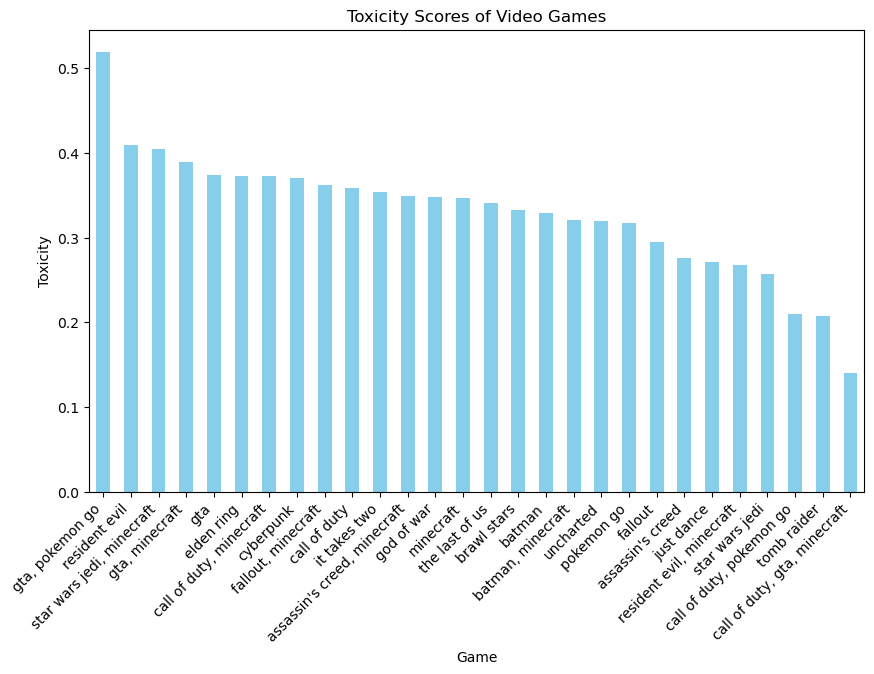

In [39]:
game_toxicity_plot = game_toxicity['video_toxicity']

plt.figure(figsize = (10, 6))
ax = game_toxicity_plot.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.xlabel('Game')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.ylabel('Toxicity')
plt.title('Toxicity Scores of Video Games')

In [42]:
game_vader_textblob = video_info_vader_txtblb_df.groupby('game')[video_sentiment_measures].mean().sort_values(by = 'video_neg', ascending=False)

In [43]:
game_vader_textblob.head()

,video_neg,video_neu,video_pos,video_compound,video_polarity,video_subjectivity
game,,,,,,
"gta, pokemon go",0.1250,0.736000,0.139000,0.790200,0.516310,0.516310
god of war,0.1170,0.710255,0.172766,0.950668,0.519808,0.519808
"assassin's creed, minecraft",0.1130,0.684000,0.202000,0.999900,0.519420,0.519420
star wars jedi,0.1120,0.712000,0.176000,0.999600,0.530155,0.530155
elden ring,0.1093,0.725650,0.165100,0.903605,0.522672,0.522672


Text(0.5, 1.0, 'Negativity Scores of Video Games')

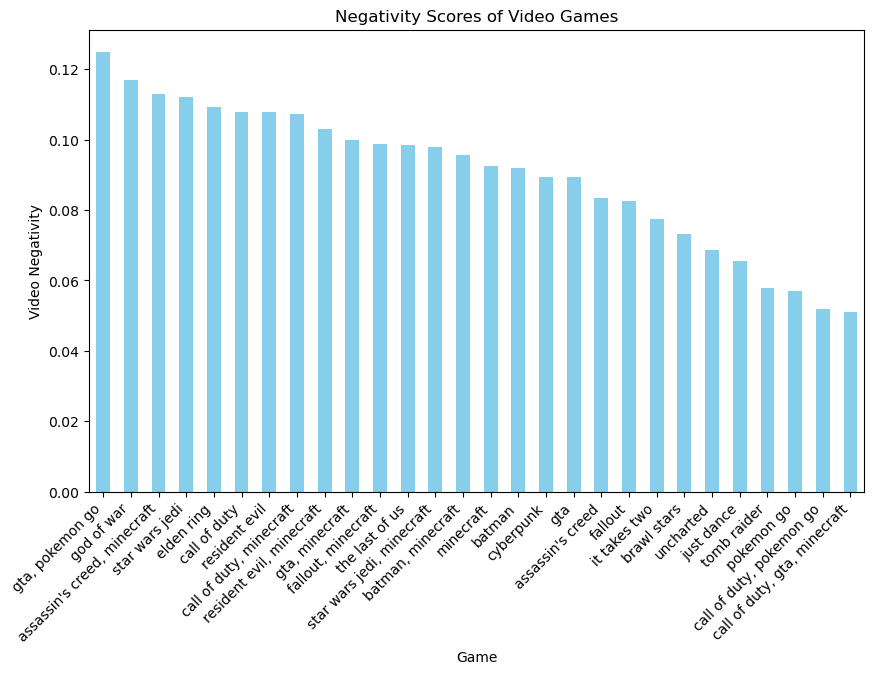

In [44]:
game_vader_textblob_plot = game_vader_textblob['video_neg']

plt.figure(figsize = (10, 6))
ax = game_vader_textblob_plot.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.xlabel('Game')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.ylabel('Video Negativity')
plt.title('Negativity Scores of Video Games')

In [ ]:
# simple_df.groupby(['genre','game']).mean()

## Toxicity by Channel

In [ ]:
channel_toxicity = simple_df.groupby('channel_name')[sentiment_measures].mean().sort_values(by = 'toxicity', ascending=False)

In [ ]:
channel_toxicity_plot = channel_toxicity['toxicity']

plt.figure(figsize = (12, 6))
ax = channel_toxicity_plot.plot(kind='bar', color='skyblue')
# Adding labels and title
plt.xlabel('YouTuber')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.ylabel('Toxicity')
plt.title('Toxicity Scores by YouTuber')

## Investigating Why different YouTuber has different Toxicity Means?

In [ ]:
# Pivot to calculate unique count of video titles for each channel and genre
count_vid_by_channel_genre = simple_df.pivot_table(index='channel_name', columns='genre', values='video_title', aggfunc='nunique', fill_value=0).reset_index()

# Rename columns for clarity
count_vid_by_channel_genre.rename(columns={'action': 'action_count', 'non-action': 'non_action_count'}, inplace=True)

In [ ]:
count_vid_by_channel_genre.head(3)

In [ ]:
plt.figure(figsize=(16, 4))

# Plot action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['action_count'], color='skyblue', width=0.4, label='Action')

# Plot non-action counts
plt.bar(count_vid_by_channel_genre['channel_name'], count_vid_by_channel_genre['non_action_count'], color='green', width=0.4, label='Non-Action', bottom = count_vid_by_channel_genre['action_count'])

# Adding labels and title
plt.xlabel('Channel Name')
plt.ylabel('Video Count')
plt.title('Action/Non-Action Video Count Proportion by Channel')
plt.legend(title='Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
count_vid_by_channel_genre['action_video_%'] = round(100*(count_vid_by_channel_genre['action_count']/(count_vid_by_channel_genre['action_count']+ count_vid_by_channel_genre['non_action_count'])),2)

In [ ]:
count_vid_by_channel_genre = count_vid_by_channel_genre.merge(channel_toxicity['toxicity'], left_on= 'channel_name', right_index=True,how = 'left')

In [ ]:
count_vid_by_channel_genre = count_vid_by_channel_genre.sort_values(by = 'action_video_%', ascending = False).reset_index(drop = True)

In [ ]:
count_vid_by_channel_genre

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(count_vid_by_channel_genre['action_video_%'], count_vid_by_channel_genre['toxicity'])
plt.xlabel('Percent of Action Video in YouTuber channel collected')
plt.ylabel('toxicity')
plt.title('Scatter Plot action videos percentage vs. toxicity score')
plt.grid(True)
plt.show()

In [ ]:
sns.regplot(x = 'action_video_%', y = 'toxicity', data = count_vid_by_channel_genre, ci = None,
                line_kws = {"color": "#526A9B"},
                scatter_kws = {"s": 20, "color": "#619AA2", "alpha": 0.6})
plt.xlabel('Percent of Action Video in YouTuber channel collected')
plt.ylabel('toxicity')
plt.title('Scatter Plot action videos percentage vs. toxicity score')
# plt.grid(True)
plt.show()